In [96]:
import numpy as np
import pandas as pd
import pandas_datareader as data
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
start_date = '2019-01-01'
end_date = '2022-01-01'
data_source = 'yahoo'

#Download stock data for 50 largest ASX Stocks as of 18/06/2022
tickers = ['BHP', 'CBA', 'CSL','NAB','WBC','MQG','WDS','FMG','ANZ','WES','TLS',
           'TCL','RIO','WOW','GMG','STO','ALL','COL','S32','NCM','QBE','RHC',
           'SHL','JHX','BXB','ASX','COH','CPU','REA','SUN','APA','EDV','JHX',
           'SCG','AMC','WTC','RMD','XRO','TPG','IAG','FPH','NST','TLC','ORG',
           'VAS','MIN','DXS','AIA','MGOC','AFI','CWN']

tickers = [ticker + '.AX' for ticker in tickers]

portfolio = data.DataReader(tickers, data_source, start_date, end_date)['Adj Close']

/Users/edwardmckenzie/opt/anaconda3/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'TLC.AX', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


In [98]:
portfolio = portfolio.fillna(0)
portfolio = portfolio.drop('TLC.AX', axis=1)

portfolio.head()

Symbols,BHP.AX,CBA.AX,CSL.AX,NAB.AX,WBC.AX,MQG.AX,WDS.AX,FMG.AX,ANZ.AX,WES.AX,...,FPH.AX,NST.AX,ORG.AX,VAS.AX,MIN.AX,DXS.AX,AIA.AX,MGOC.AX,AFI.AX,CWN.AX
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,25.527742,61.173683,179.468933,20.549503,21.484941,95.774704,30.490000,2.602597,20.679657,27.138575,...,11.761262,8.816063,5.482561,67.344208,13.175030,9.141147,6.533384,0.0,5.420233,10.599277
2019-01-02,25.527742,61.923588,183.409149,20.810394,21.976427,98.445824,31.540001,2.633953,21.095678,27.310610,...,12.013775,9.130922,5.612684,68.388977,13.263100,9.184593,6.581074,0.0,5.429177,10.735167
2019-01-03,25.300356,61.966694,182.518509,20.853874,21.967651,98.069359,31.910000,2.696666,21.017675,27.594473,...,12.101183,9.264499,5.734134,68.053505,12.990086,9.193283,6.600149,0.0,5.402344,10.717048
2019-01-06,26.065882,62.552837,181.521347,21.062586,22.134403,99.109123,32.320000,2.784465,21.312353,27.714893,...,12.159456,8.959181,5.820883,68.896980,13.659407,9.201972,6.590611,0.0,5.456010,10.707989
2019-01-07,26.096201,62.466640,183.864182,21.253906,22.397699,100.991447,32.419998,2.840907,21.546366,27.714893,...,12.033200,8.730192,5.951006,69.385818,13.756281,9.175904,6.571536,0.0,5.384455,10.889174


In [110]:
#Select 5 stocks at random to create an optimised portfolio
from random import sample

ticker_indices = sample(range(len(tickers)), 5)

selected_stocks = [tickers[i] for i in ticker_indices]

selected_stocks

['TCL.AX', 'GMG.AX', 'MIN.AX', 'JHX.AX', 'MQG.AX']

In [111]:
df = pd.DataFrame()

for i in range(len(selected_stocks)):
    df_temp = portfolio[selected_stocks[i]]
    df = pd.concat([df, df_temp], axis=1)

df.tail()

,TCL.AX,GMG.AX,MIN.AX,JHX.AX,MQG.AX
2021-12-22 00:00:00,13.592258,26.023197,53.189999,55.189999,204.190002
2021-12-23 00:00:00,13.621936,26.072916,54.990002,55.080002,204.250000
2021-12-28 00:00:00,13.800000,26.590000,56.200001,56.259998,207.210007
2021-12-29 00:00:00,13.790000,26.959999,57.540001,56.009998,207.360001
2021-12-30 00:00:00,13.820000,26.500000,56.000000,55.299999,205.399994


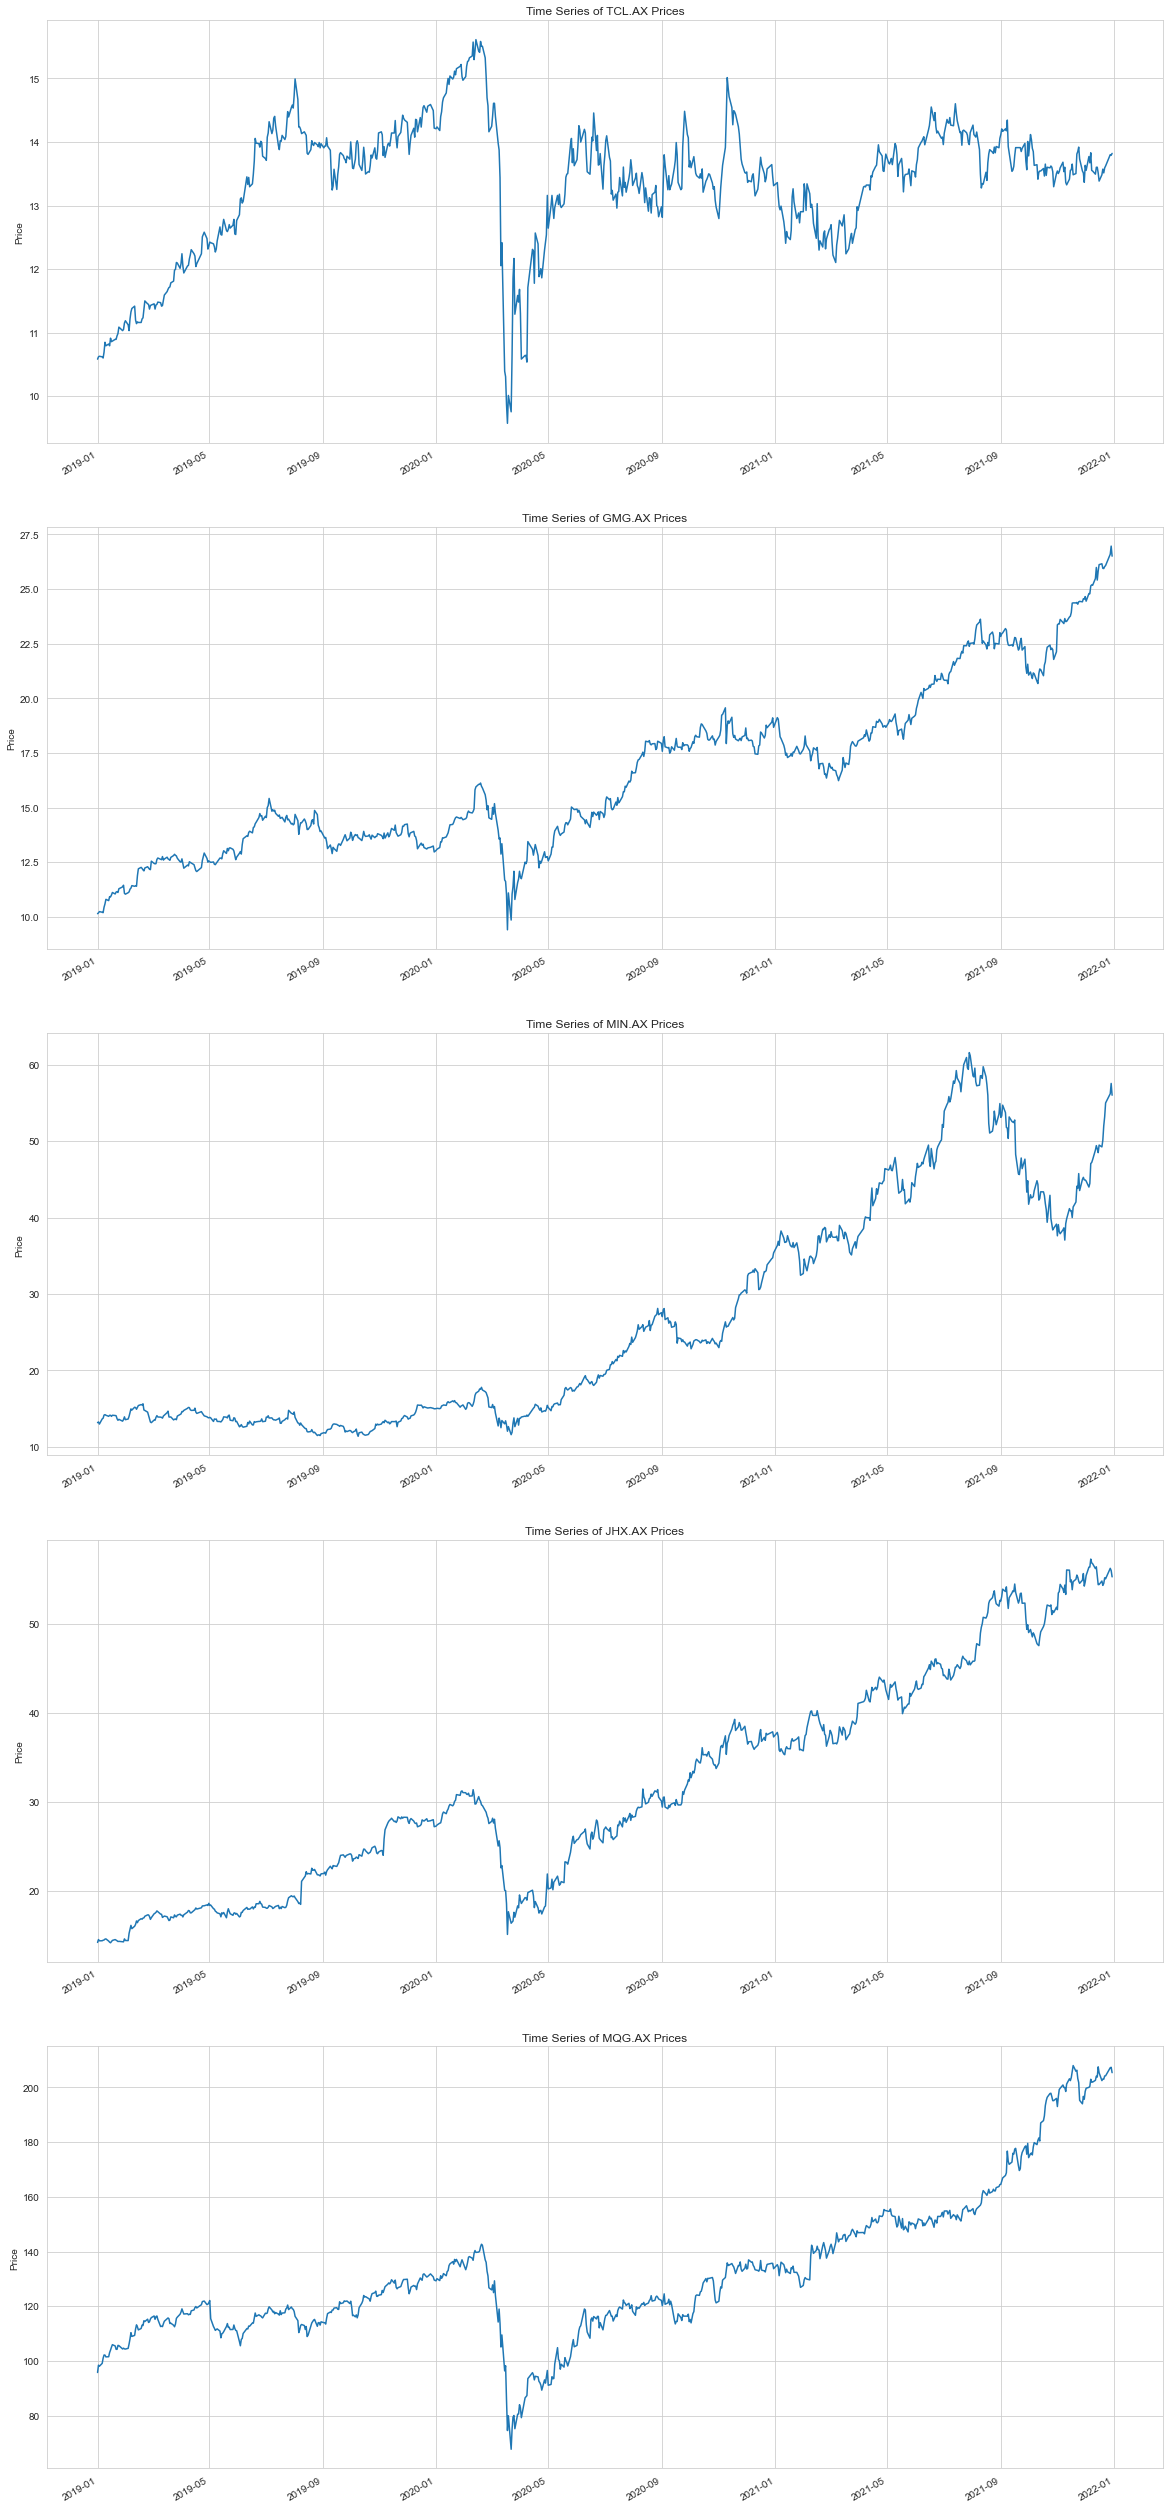

In [123]:
# Plot time series of prices

fig, axs = plt.subplots(5, figsize=(20,50))

for i, ticker in enumerate(df.columns):
    df[ticker].plot(ax=axs[i])
    axs[i].set_title(f"Time Series of {ticker} Prices")
    axs[i].set_ylabel("Price")

In [113]:
rets = df.pct_change()
rets = rets.dropna()

mu = rets.mean()
sgm = rets.std()
NOSD = 3

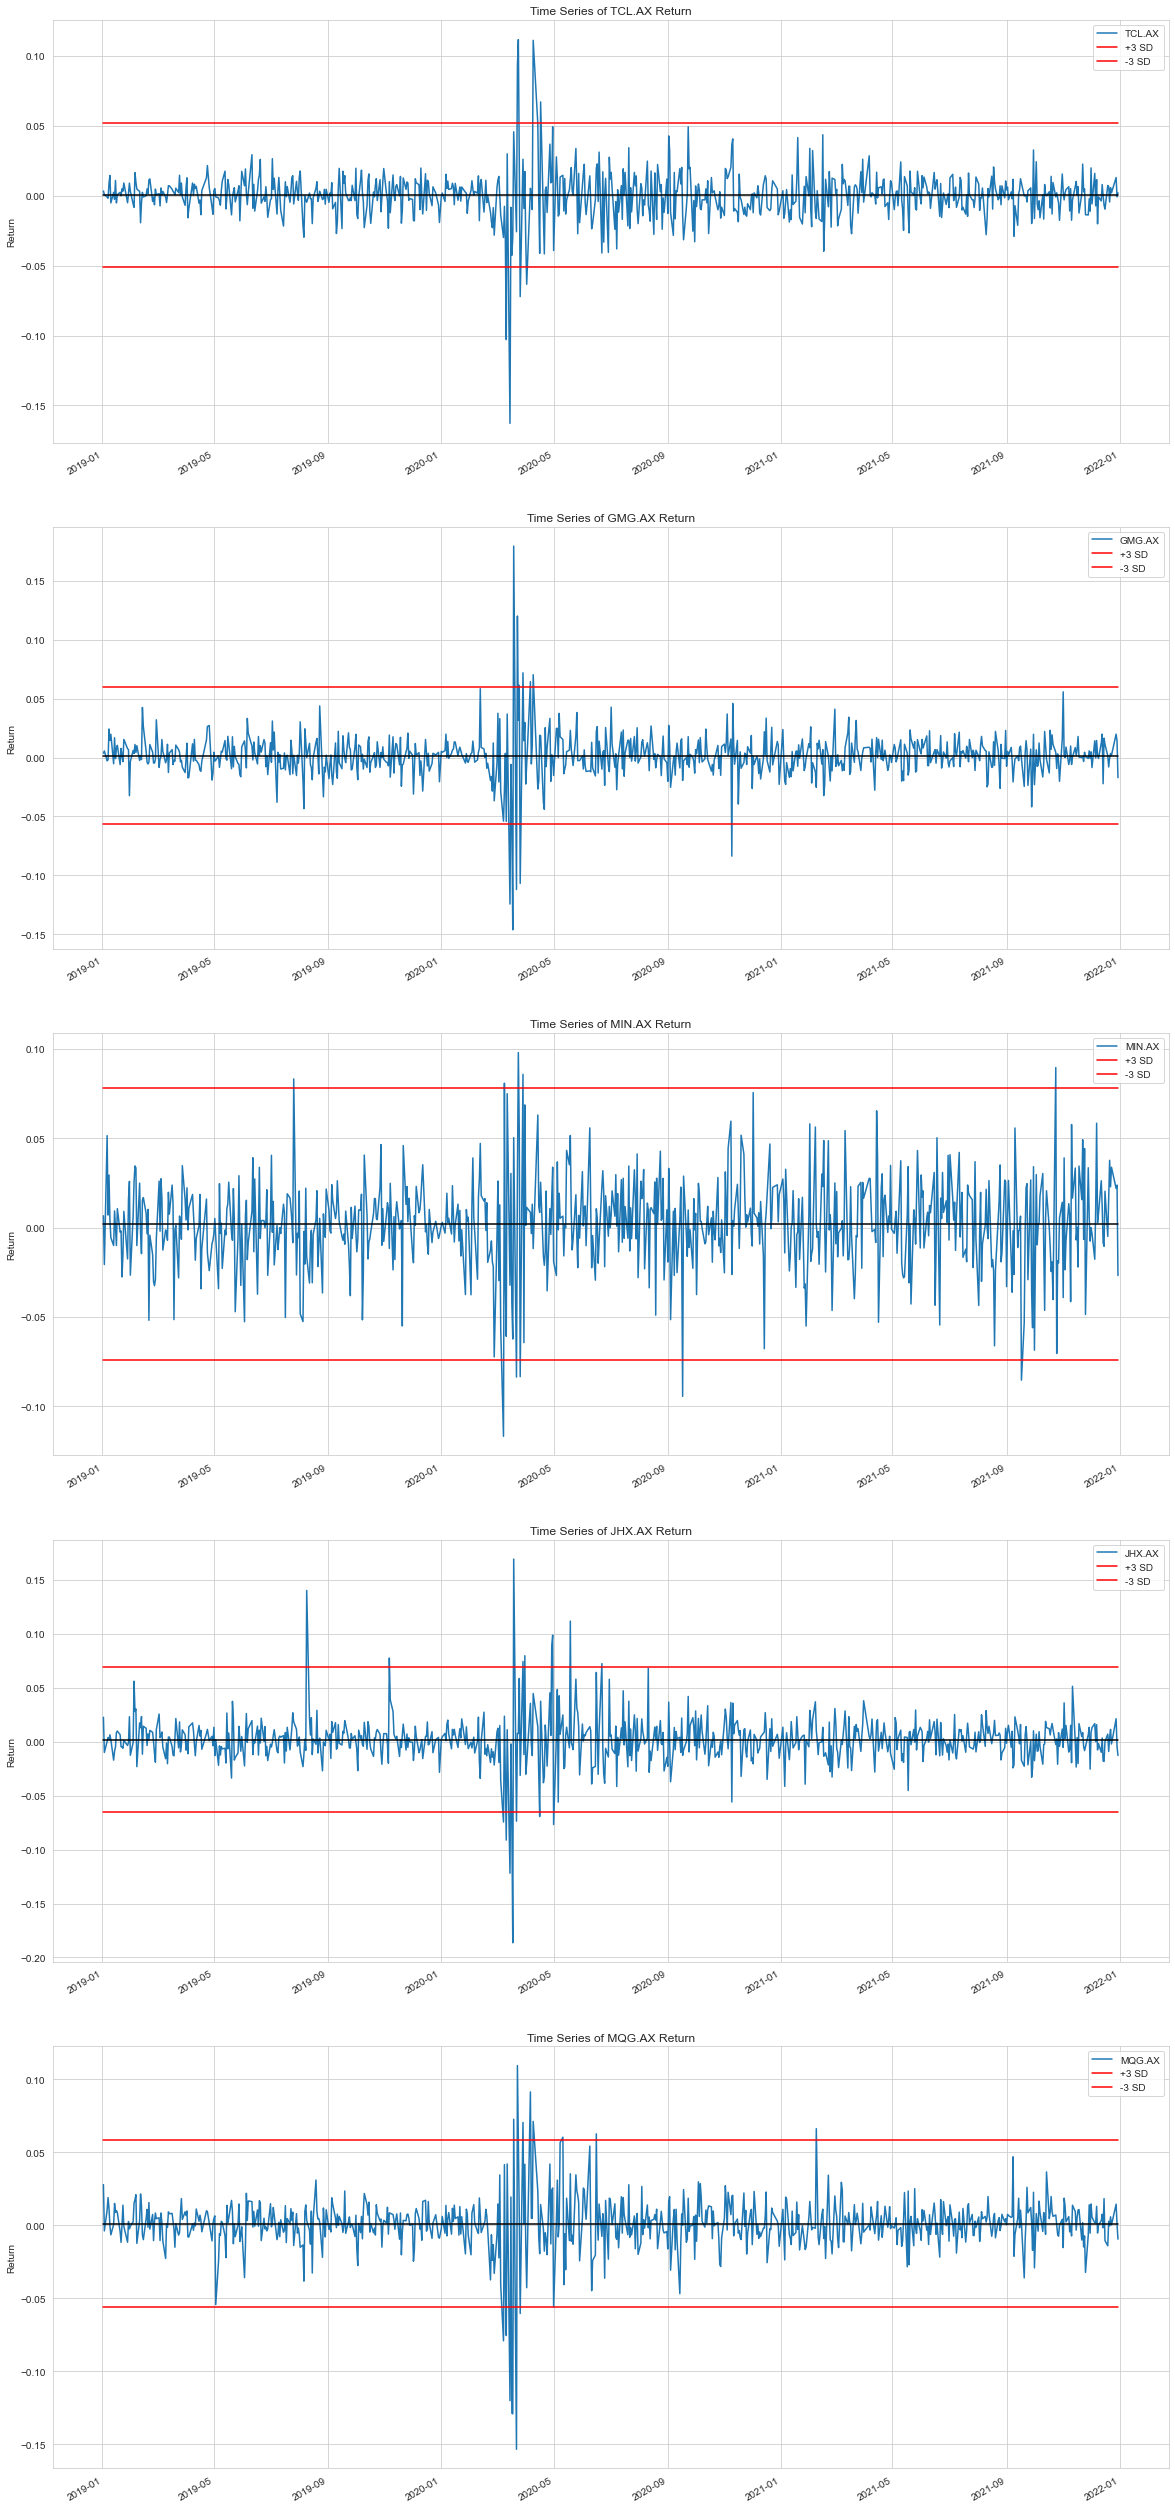

In [124]:
fig, axs = plt.subplots(5, figsize=(20,50))

for i, ticker in enumerate(df.columns):
    rets[ticker].plot(ax=axs[i])
    axs[i].set_title(f"Time Series of {ticker} Return")
    axs[i].set_ylabel("Return")
    axs[i].plot(rets.index, len(rets)*[mu[i]], color='k')
    axs[i].plot(rets.index, len(rets)*[mu[i]+NOSD*sgm[i]], color='r', label='+3 SD')
    axs[i].plot(rets.index, len(rets)*[mu[i]-NOSD*sgm[i]], color='r', label='-3 SD')
    axs[i].legend(loc='upper right')


In [115]:
def ptfMeanVar(ww, avgReturns, covMatrix):
    """
    ww: vector of weights
    avgReturns: vector of mean returns of the returns of the assets
    covMatrix: covariance matrix of the returns
    """
    ## returns mean and variance (normalised) of a given portfolio
    returns = np.sum(avgReturns*ww) * 252.
    std = np.sqrt(np.dot(ww.T, np.dot(covMatrix, ww))) * np.sqrt(252.)
    return std, returns

def randomPtf(nb_stocks, nbPtf, avgReturns, covMatrix, r): ## Generate random portfolios
    """
    nb_stocks: specify a number of stocks in the portfolio
    nbPtf: specify a number of portfolios to be generated
    avgReturns: vector of mean returns of the returns of the assets
    covMatrix: covariance matrix of the returns
    r: target return (to compute the Sharpe ratio)
    """
    output = np.zeros((3,nbPtf))
    www = []
    for i in range(nbPtf):
        ww = np.random.random(nb_stocks)
        ww /= np.sum(ww) ## make sure weights sum up to 1
        www.append(ww)
        std, returns = ptfMeanVar(ww, avgReturns, covMatrix)
        output[:,i] = std, returns, (returns - r) / std ## the third quantity is the Sharpe ratio
    return output, www
     ## for each i, www[i] is the vector of weights (positive and summing up to one) of the components of portfolio[i]
     ## for each i, output[i] returns (standard deviation, returns, Sharpe ratio) of portfolio[i]

In [118]:
def plotMarkowitz(df, avgReturns, covMatrix, nbPtf, r):
    """
    Create and plot the Markowitz frontier
    """
    nbStocks = len(df.columns)
    results, weights = randomPtf(nbStocks, nbPtf, avgReturns, covMatrix, r)

    max_sharpe_idx = np.argmax(results[2]) ## ID of the largest Sharpe ratio
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    maxSharpeAlloc = pd.DataFrame(100.*weights[max_sharpe_idx],index=df.columns,columns=['allocation']).T

    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    minSharpeAlloc = pd.DataFrame(100.*weights[min_vol_idx],index=df.columns,columns=['allocation']).T
    #minSharpeAlloc.allocation = [round(i*100,2)for i in minSharpeAlloc.allocation]

    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:], cmap='YlGnBu', marker='x', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='x',color='r',s=100, label='Max Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='o',color='k',s=100, alpha=0.8, label='Min volatility')

    def get_cmap(n, name='hsv'):
        return plt.cm.get_cmap(name, n)

    cmap = get_cmap(nbStocks)
    for i in range(nbStocks): ## Plot each individual stock
        myVar = np.sqrt(covMatrix.values[i,i]*252.)
        myRet = avgReturns.values[i]*252.
        plt.scatter(myVar,myRet,s=100, color=cmap(i), label=rets.columns.values[i])

    plt.xlabel('Volatility')
    plt.ylabel('Returns')
    plt.legend(loc='best', prop={'size': 12})
    plt.show()

    print("-"*30)
    print("Max Sharpe Ratio Portfolio")
    print("Return, vol, Sharpe:", round(rp,2), round(sdp,2), round((rp - r) / sdp,2))
    print(maxSharpeAlloc)
    print("-"*30)
    print("Min Volatility Portfolio")
    print("Return, vol, Sharpe:", round(rp_min,2), round(sdp_min,2), round((rp_min - r) / sdp_min,2))
    print(minSharpeAlloc)
    print("-"*30)

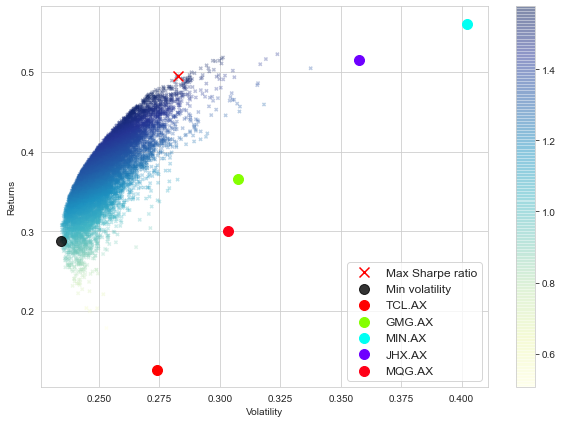

------------------------------
Max Sharpe Ratio Portfolio
Return, vol, Sharpe: 0.5 0.28 1.58
              TCL.AX     GMG.AX     MIN.AX     JHX.AX    MQG.AX
allocation  0.379909  19.790409  37.791269  39.328774  2.709639
------------------------------
Min Volatility Portfolio
Return, vol, Sharpe: 0.29 0.23 1.01
               TCL.AX     GMG.AX     MIN.AX    JHX.AX     MQG.AX
allocation  42.035813  24.105324  15.960184  1.519803  16.378876
------------------------------


In [122]:
avgReturns, covMatrix = rets.mean(), rets.cov()

nbPtf = 10000 ## number of runs
r = 0.05       ## interest rate
plotMarkowitz(rets, avgReturns, covMatrix, nbPtf, r)